In [1]:
import pandas as pd
df = pd.read_parquet(r"D:\OneDrive - Aalto University\Masters\Masters Thesis\Thesis S\Shortest distance\OD_pairs_SPTT_Co2_withoutDemandData\HELSINKI_ESPOO_CAR_PT_CO2_EmissionData_2023_H3_R9.parquet")
df.head(4)

,Origin_Hexagon_ID,Destination_Hexagon_ID,car_dist,car_time,car_co2,pt_dist,pt_time,pt_co2
0,891126d2167ffff,891126d3073ffff,12103.72,40.99,1881.40,16021,38.8,526.03
1,891126d2167ffff,891126c2683ffff,13374.07,28.89,2078.87,13765,36.4,761.13
2,891126d2167ffff,8908996a98bffff,18903.82,36.22,2938.41,21274,69.6,933.15
3,891126d2167ffff,8908996d6b3ffff,9870.12,22.47,1534.21,9027,35.1,340.53


In [1]:
import pandas as pd

# Load all attribute CSVs
df_pop = pd.read_csv("hex_population.csv")                 # columns: ID, population
df_speed = pd.read_csv("hexes_speed_traffic.csv")          # columns: ID, avg_speed, n_traffic_signals
df_area = pd.read_csv("hex_total_built_area.csv")          # columns: ID, total_built_area
df_stops = pd.read_csv("hexes_with_stop_counts.csv")    # columns: hex_id, stop_count

# Consistent column name for joining
df_pop = df_pop.rename(columns={'ID': 'hex_id'})
df_speed = df_speed.rename(columns={'ID': 'hex_id'})
df_area = df_area.rename(columns={'ID': 'hex_id'})

# Merge all dataframes on hex_id (outer join to keep all hexes)
df_merged = df_pop.merge(df_speed, on='hex_id', how='outer') \
                  .merge(df_area, on='hex_id', how='outer') \
                  .merge(df_stops, on='hex_id', how='outer')

print("Combined hex attribute table preview:")
print(df_merged.head())

# Save to CSV if you want
df_merged.to_csv("hex_attributes_combined.csv", index=False)
print("Saved as hex_attributes_combined.csv")


Combined hex attribute table preview:
            hex_id  population  avg_speed  n_traffic_signals  \
0  891126d4ecbffff         378  32.857143                  0   
1  891126d2167ffff         285  56.666667                  0   
2  891126c319bffff           0  30.000000                  0   
3  891126da957ffff           0        NaN                  0   
4  891126d768bffff         393  37.058824                  0   

   total_built_area  stop_count  
0           10948.8           1  
1            6127.3           2  
2               0.0           0  
3               0.0           0  
4            4569.1           2  
Saved as hex_attributes_combined.csv


In [2]:
import pandas as pd

# Load all attribute CSVs
df_pop = pd.read_csv("hex_population.csv")                 # columns: ID, population
df_speed = pd.read_csv("hexes_speed_traffic.csv")          # columns: ID, avg_speed, n_traffic_signals
df_area = pd.read_csv("hex_total_built_area.csv")          # columns: ID, total_built_area
df_stops = pd.read_csv("hexes_with_stop_counts.csv")    # columns: hex_id, stop_count

# Consistent column name for joining
df_pop = df_pop.rename(columns={'ID': 'hex_id'})
df_speed = df_speed.rename(columns={'ID': 'hex_id'})
df_area = df_area.rename(columns={'ID': 'hex_id'})

# Show unique hex counts
print(f"Population table hexes:      {df_pop['hex_id'].nunique()}")
print(f"Speed/traffic table hexes:   {df_speed['hex_id'].nunique()}")
print(f"Built area table hexes:      {df_area['hex_id'].nunique()}")
print(f"Stops table hexes:           {df_stops['hex_id'].nunique()}")

# Show how many are shared (intersection) between all tables
hexes_all = set(df_pop['hex_id']) & set(df_speed['hex_id']) & set(df_area['hex_id']) & set(df_stops['hex_id'])
print(f"Hexes present in all tables: {len(hexes_all)}")


Population table hexes:      8540
Speed/traffic table hexes:   8540
Built area table hexes:      8540
Stops table hexes:           8540
Hexes present in all tables: 8540


In [3]:
import pandas as pd

# Load main OD data
df = pd.read_parquet(r"D:\OneDrive - Aalto University\Masters\Masters Thesis\Thesis S\Shortest distance\OD_pairs_SPTT_Co2_withoutDemandData\HELSINKI_ESPOO_CAR_PT_CO2_EmissionData_2023_H3_R9.parquet")

# Load combined attributes
attr = pd.read_csv("hex_attributes_combined.csv")

# Merge: attach attributes for origin hexagon
df_merged = df.merge(attr, left_on='Origin_Hexagon_ID', right_on='hex_id', how='left', suffixes=('', '_origin'))

print(df_merged.head())
print(f"Resulting rows: {len(df_merged)}")




  Origin_Hexagon_ID Destination_Hexagon_ID  car_dist  car_time  car_co2  \
0   891126d2167ffff        891126d3073ffff  12103.72     40.99  1881.40   
1   891126d2167ffff        891126c2683ffff  13374.07     28.89  2078.87   
2   891126d2167ffff        8908996a98bffff  18903.82     36.22  2938.41   
3   891126d2167ffff        8908996d6b3ffff   9870.12     22.47  1534.21   
4   891126d2167ffff        89089961c6fffff  23900.66     43.11  3715.12   

   pt_dist  pt_time   pt_co2           hex_id  population  avg_speed  \
0    16021     38.8   526.03  891126d2167ffff         285  56.666667   
1    13765     36.4   761.13  891126d2167ffff         285  56.666667   
2    21274     69.6   933.15  891126d2167ffff         285  56.666667   
3     9027     35.1   340.53  891126d2167ffff         285  56.666667   
4    27348     85.8  1476.23  891126d2167ffff         285  56.666667   

   n_traffic_signals  total_built_area  stop_count  
0                  0            6127.3           2  
1         

In [4]:
# Save to parquet (optional)
df_merged.to_parquet("all_attributes_attached.parquet", index=False)
print("Saved: OD_with_origin_hex_attributes.parquet")

Saved: OD_with_origin_hex_attributes.parquet


In [10]:
import pandas as pd

# Load locomizer
loc_path = r"D:\OneDrive - Aalto University\Masters\Masters Thesis\Thesis - Development\MS-thesis-development\data\Locomizer_latest_april_03.csv"
loc_df = pd.read_csv(loc_path, usecols=['ORIGIN_CODE9', 'DESTINATION_CODE9', 'ORIGIN_Municipality'])

# Make sure all IDs are strings
loc_df['ORIGIN_CODE9'] = loc_df['ORIGIN_CODE9'].astype(str)
loc_df['DESTINATION_CODE9'] = loc_df['DESTINATION_CODE9'].astype(str)

# Stack both origin and destination hexes into one column with municipality
hex_muni = pd.concat([
    loc_df[['ORIGIN_CODE9', 'ORIGIN_Municipality']].rename(
        columns={'ORIGIN_CODE9': 'hex_id', 'ORIGIN_Municipality': 'municipality'}
    ),
    loc_df[['DESTINATION_CODE9', 'ORIGIN_Municipality']].rename(
        columns={'DESTINATION_CODE9': 'hex_id', 'ORIGIN_Municipality': 'municipality'}
    )
])

# Drop duplicates so each hex_id appears only once
hex_muni = hex_muni.drop_duplicates(subset=['hex_id'])

print(f"Unique hexes with municipality: {hex_muni.shape[0]}")
# Optional: Save for checking
# hex_muni.to_csv("all_unique_hexes_with_municipality.csv", index=False)


Unique hexes with municipality: 5891


In [11]:
# Load your big parquet file
df = pd.read_parquet("all_attributes_attached.parquet")
df['Origin_Hexagon_ID'] = df['Origin_Hexagon_ID'].astype(str)

# Merge municipality info based on Origin_Hexagon_ID
merged = df.merge(
    hex_muni.rename(columns={'hex_id': 'Origin_Hexagon_ID', 'municipality': 'origin_municipality'}),
    on='Origin_Hexagon_ID',
    how='left'
)

print(f"Merged data shape: {merged.shape}")
print("Missing municipalities after merge:", merged['origin_municipality'].isna().sum())

# Save final file
merged.to_parquet("all_attributes_attached_with_municipality.parquet", index=False)


Merged data shape: (24087182, 15)
Missing municipalities after merge: 4570746


In [13]:
import pandas as pd

# Load the merged parquet
df = pd.read_parquet("all_attributes_attached_with_municipality.parquet")

# Filter out rows with missing origin_municipality
df_filtered = df[df['origin_municipality'].notna()].reset_index(drop=True)

# Save the filtered DataFrame
df_filtered.to_parquet("all_attributes_attached_with_municipality_filtered.parquet", index=False)
print(f"Saved {len(df_filtered)} rows to all_attributes_attached_with_municipality_filtered.parquet")

# Read it back (if you want to use it right away)
df = pd.read_parquet("all_attributes_attached_with_municipality_filtered.parquet")
print(df.head())


Saved 19516436 rows to all_attributes_attached_with_municipality_filtered.parquet
  Origin_Hexagon_ID Destination_Hexagon_ID  car_dist  car_time  car_co2  \
0   891126d2167ffff        891126d3073ffff  12103.72     40.99  1881.40   
1   891126d2167ffff        891126c2683ffff  13374.07     28.89  2078.87   
2   891126d2167ffff        8908996a98bffff  18903.82     36.22  2938.41   
3   891126d2167ffff        8908996d6b3ffff   9870.12     22.47  1534.21   
4   891126d2167ffff        89089961c6fffff  23900.66     43.11  3715.12   

   pt_dist  pt_time   pt_co2           hex_id  population  avg_speed  \
0    16021     38.8   526.03  891126d2167ffff         285  56.666667   
1    13765     36.4   761.13  891126d2167ffff         285  56.666667   
2    21274     69.6   933.15  891126d2167ffff         285  56.666667   
3     9027     35.1   340.53  891126d2167ffff         285  56.666667   
4    27348     85.8  1476.23  891126d2167ffff         285  56.666667   

   n_traffic_signals  total_built_

In [ ]:
import pandas as pd

# Load your merged parquet
df = pd.read_parquet("all_attributes_attached_with_municipality_filtered.parquet")

# Count how many OD pairs do NOT have an origin municipality
missing_count = df['origin_municipality'].isna().sum()
total_count = len(df)

print(f"OD pairs without origin municipality: {missing_count} / {total_count}")
print(f"Percentage missing: {missing_count / total_count:.2%}")

## Training on Espoo region and predicting for helsinki

In [12]:
# import pandas as pd

# # Read filtered parquet file
# df = pd.read_parquet("all_attributes_attached_with_municipality_filtered.parquet")

# # Split data
# test_df = df[df['origin_municipality'].str.lower() == 'helsinki'].reset_index(drop=True)
# train_df = df[df['origin_municipality'].str.lower() != 'helsinki'].reset_index(drop=True)

# print(f"Train size: {len(train_df)}")
# print(f"Test size: {len(test_df)}")

# # Save to Parquet (optional)
# train_df.to_parquet("train_data.parquet", index=False)
# test_df.to_parquet("test_data.parquet", index=False)


OD pairs without origin municipality: 4570746 / 24087182
Percentage missing: 18.98%


Sampled 5000 unique OD trips
MSE: 1.5936240044848908e-05
R^2: 0.9999999999916855
Predictions saved as car_co2_predictions.csv


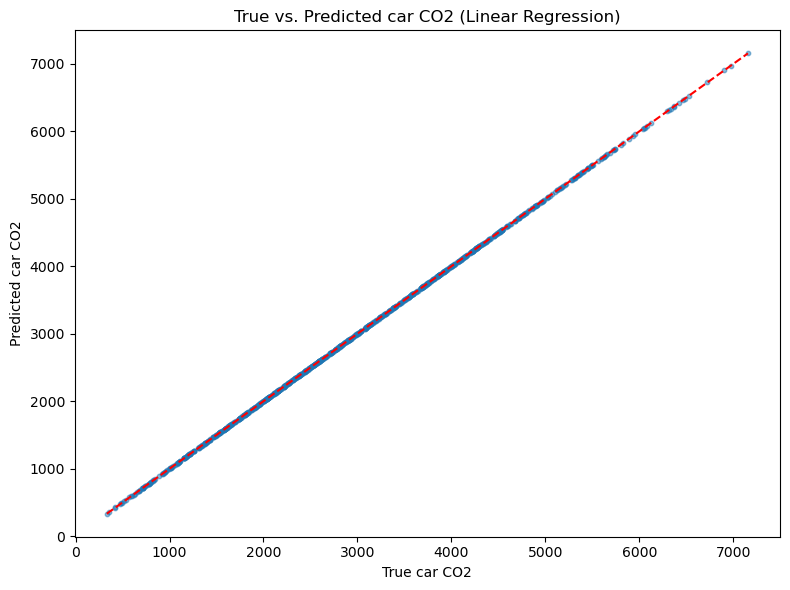

In [6]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import OneHotEncoder
# import numpy as np
# import matplotlib.pyplot as plt

# # --- 1. Sample 5000 unique OD pairs (keep one row per OD pair) ---
# unique_od = (
#     df_merged
#     .drop_duplicates(subset=['Origin_Hexagon_ID', 'Destination_Hexagon_ID'])
#     .sample(n=5000, random_state=42)
# )

# print(f"Sampled {len(unique_od)} unique OD trips")

# # --- 2. Prepare features and target ---
# features = [
#     'Origin_Hexagon_ID', 'Destination_Hexagon_ID',
#     'population', 'avg_speed', 'total_built_area', 'n_traffic_signals', 'stop_count',
#     'car_time', 'car_dist'
# ]
# target = 'car_co2'
# df = unique_od[features + [target]].dropna()

# # --- 3. Encode hex ids (handle sklearn version differences) ---
# cat_features = ['Origin_Hexagon_ID', 'Destination_Hexagon_ID']
# try:
#     enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # For sklearn >=1.2
# except TypeError:
#     enc = OneHotEncoder(sparse=False, handle_unknown='ignore')         # For older sklearn

# cat_encoded = enc.fit_transform(df[cat_features])
# cat_encoded_cols = enc.get_feature_names_out(cat_features)

# # --- 4. Combine features ---
# numerical = df[['population', 'avg_speed', 'total_built_area', 'n_traffic_signals', 'stop_count', 'car_time', 'car_dist']].values
# X = np.hstack([cat_encoded, numerical])
# y = df[target].values

# # --- 5. Train-test split ---
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # --- 6. Train linear regression ---
# model = LinearRegression()
# model.fit(X_train, y_train)

# # --- 7. Predict and Evaluate ---
# y_pred = model.predict(X_test)
# print("MSE:", mean_squared_error(y_test, y_pred))
# print("R^2:", r2_score(y_test, y_pred))

# # --- 8. Save true and predicted to CSV ---
# output_df = pd.DataFrame({
#     "true_car_co2": y_test,
#     "predicted_car_co2": y_pred
# })
# output_df.to_csv("car_co2_predictions.csv", index=False)
# print("Predictions saved as car_co2_predictions.csv")

# # --- 9. Plot ---
# plt.figure(figsize=(8,6))
# plt.scatter(y_test, y_pred, s=10, alpha=0.5)
# plt.xlabel("True car CO2")
# plt.ylabel("Predicted car CO2")
# plt.title("True vs. Predicted car CO2 (Linear Regression)")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.tight_layout()
# plt.show()


Test set size: 1456065
MSE: 303096.6251636207
R^2: 0.841429979585525
Predictions saved as car_co2_predictions_by_municipality.csv


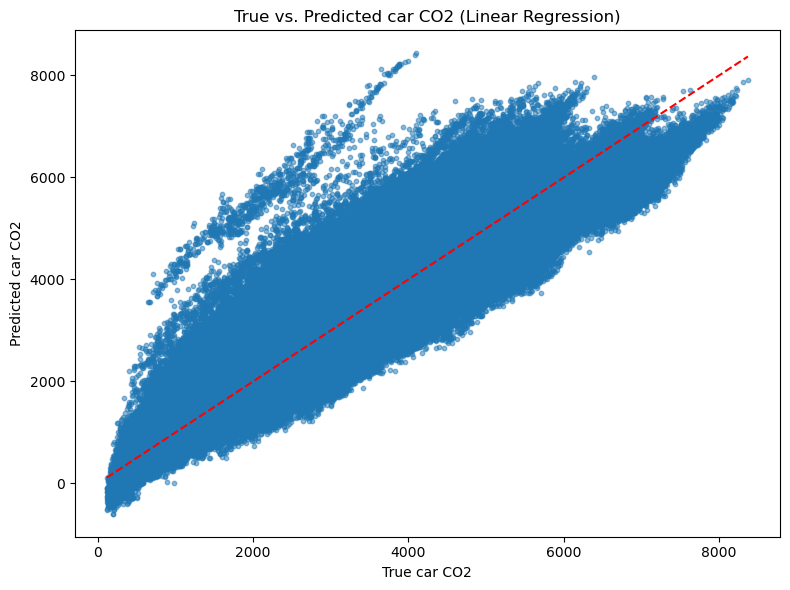

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

# 1. Load parquet and split by municipality
df = pd.read_parquet("all_attributes_attached_with_municipality_filtered.parquet")
test_df = df[df['origin_municipality'].str.lower() == 'helsinki'].reset_index(drop=True)
train_df = df[df['origin_municipality'].str.lower() != 'helsinki'].reset_index(drop=True)

# 2. Take 20% random sample of each (set random_state for reproducibility)
test_sample = test_df.sample(frac=0.2, random_state=42).copy()
train_sample = train_df.sample(frac=0.2, random_state=42).copy()

# 3. Columns to use
cat_features = ['Origin_Hexagon_ID', 'Destination_Hexagon_ID']
# numerical_features = ['population', 'avg_speed', 'total_built_area', 'n_traffic_signals', 'stop_count', 'car_time', 'car_dist']
numerical_features = ['population', 'avg_speed', 'total_built_area', 'n_traffic_signals', 'stop_count', 'car_time']
# numerical_features = ['population', 'avg_speed', 'total_built_area', 'n_traffic_signals', 'stop_count']
target = 'car_co2'
all_features = cat_features + numerical_features + [target]

# 4. Drop rows with NaN in any relevant feature or target
train_sample = train_sample.dropna(subset=all_features)
test_sample = test_sample.dropna(subset=all_features)

# 5. Encode hex IDs as integers
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_sample[cat_features] = enc.fit_transform(train_sample[cat_features])
test_sample[cat_features]  = enc.transform(test_sample[cat_features])

# 6. Prepare data for ML
X_train = train_sample[cat_features + numerical_features].values
y_train = train_sample[target].values

X_test = test_sample[cat_features + numerical_features].values
y_test = test_sample[target].values

# 7. Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 8. Metrics and outputs
print("Test set size:", len(y_test))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

# 9. Save predictions and true values
output_df = pd.DataFrame({
    "true_car_co2": y_test,
    "predicted_car_co2": y_pred
})
output_df.to_csv("car_co2_predictions_by_municipality.csv", index=False)
print("Predictions saved as car_co2_predictions_by_municipality.csv")

# 10. Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, s=10, alpha=0.5)
plt.xlabel("True car CO2")
plt.ylabel("Predicted car CO2")
plt.title("True vs. Predicted car CO2 (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


Feature importances (numerical features only):
population            : -0.0485
avg_speed             :  4.1
total_built_area      : -0.00214
n_traffic_signals     : -9.43
stop_count            :  8.4
car_time              :  89.9


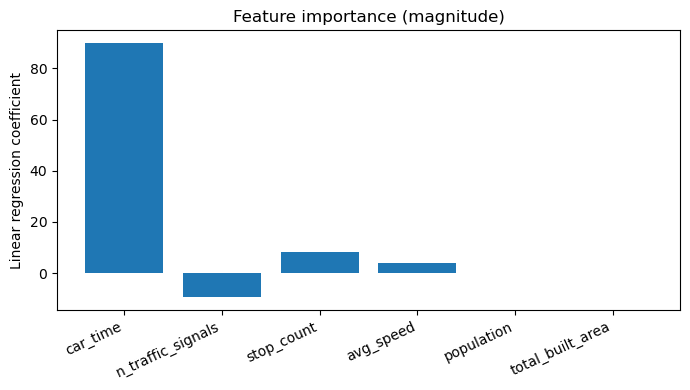

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Get all feature names (categorical + numerical)
all_feature_names = cat_features + numerical_features

# 2. Get coefficients
coefs = model.coef_

# 3. Print coefficients for numerical features only (skip hexagon IDs)
num_idx = [all_feature_names.index(f) for f in numerical_features]
num_coefs = coefs[num_idx]

print("Feature importances (numerical features only):")
for name, coef in zip(numerical_features, num_coefs):
    print(f"{name:22s}: {coef: .3g}")

# 4. Plot
plt.figure(figsize=(7,4))
sorted_idx = np.argsort(np.abs(num_coefs))[::-1]
plt.bar([numerical_features[i] for i in sorted_idx], num_coefs[sorted_idx])
plt.xticks(rotation=25, ha='right')
plt.ylabel('Linear regression coefficient')
plt.title('Feature importance (magnitude)')
plt.tight_layout()
plt.show()


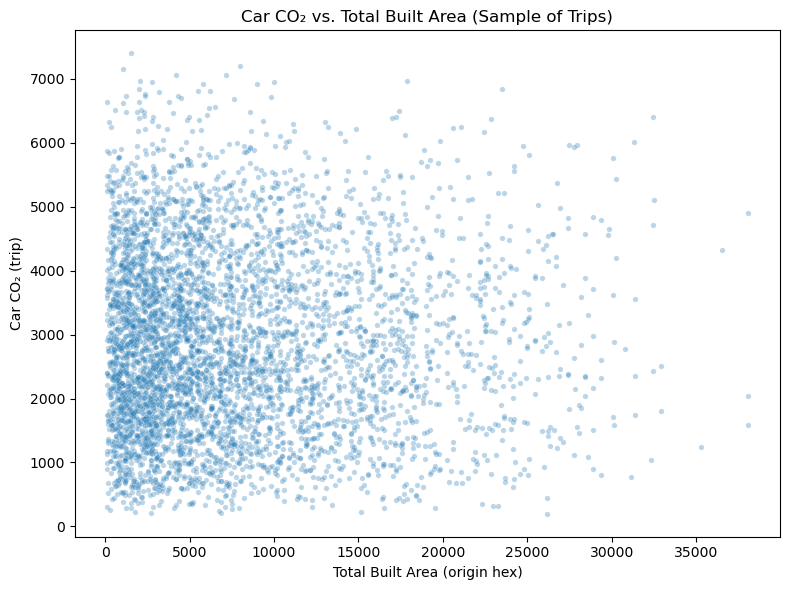

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df or df_merged, change as needed:
df = pd.read_parquet("all_attributes_attached_with_municipality_filtered.parquet")

# Optional: filter out missing or zero built area values
df_plot = df.dropna(subset=['car_co2', 'total_built_area'])
df_plot = df_plot[df_plot['total_built_area'] > 0]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_plot.sample(n=5000, random_state=42) if len(df_plot) > 5000 else df_plot,
    x='total_built_area',
    y='car_co2',
    alpha=0.3,
    s=15
)
plt.xlabel("Total Built Area (origin hex)")
plt.ylabel("Car CO₂ (trip)")
plt.title("Car CO₂ vs. Total Built Area (Sample of Trips)")
plt.tight_layout()
plt.show()
